In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("./Data/trainData.csv")
test = pd.read_csv("./Data/testData.csv")

In [3]:
train.columns

Index(['id', 'member_id', 'loan_amnt', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [4]:
len(train.columns)

33

In [5]:
train.shape

(226067, 33)

In [6]:
test.shape

(226067, 33)

Pre-processing Train data

In [7]:
# Check which columns have null values and how many null values each column has
null_counts = train.isnull().sum()

# Filter and display only the columns with null values
null_columns = null_counts[null_counts > 0]

print("Columns with null values:")
print(null_columns)

Columns with null values:
id                            226067
member_id                     226067
emp_length                     14611
dti                              180
delinq_2yrs                        5
inq_last_6mths                     5
mths_since_last_delinq        115840
open_acc                           5
pub_rec                            5
revol_util                       190
total_acc                          5
collections_12_mths_ex_med        16
acc_now_delinq                     5
tot_coll_amt                    7107
tot_cur_bal                     7107
total_rev_hi_lim                7107
dtype: int64


In [8]:
train = train.drop(['id','member_id'], axis=1)

In [9]:
train.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,18600,10.99,608.86,B,6 years,RENT,80000.0,Fully Paid,12.92,0.0,...,0.0,0.0,0.0,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0
1,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,10.62,1.0,...,0.0,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
2,12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,17.92,0.0,...,0.0,0.0,0.0,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
3,16000,19.42,589.90,D,7 years,RENT,64000.0,Current,3.90,1.0,...,0.0,0.0,0.0,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
4,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.0,Fully Paid,19.08,1.0,...,0.0,0.0,0.0,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0


In [10]:
train['emp_length'].unique()

array(['6 years', '4 years', '10+ years', '7 years', '1 year', '9 years',
       '< 1 year', '5 years', '3 years', nan, '8 years', '2 years'],
      dtype=object)

In [11]:
# Handle missing values
train['emp_length'] = train['emp_length'].fillna('< 1 year')

# Convert categorical values to numerical
train['emp_length'] = train['emp_length'].str.extract(r'(\d+)').astype(float)


In [12]:
train['emp_length'].unique()

array([ 6.,  4., 10.,  7.,  1.,  9.,  5.,  3.,  8.,  2.])

In [13]:
train['emp_length'].isna().sum()

0

In [14]:
columns_list = ["dti","delinq_2yrs","inq_last_6mths","mths_since_last_delinq","open_acc","pub_rec","revol_util","total_acc","collections_12_mths_ex_med","acc_now_delinq","tot_coll_amt","tot_cur_bal","total_rev_hi_lim"]

In [15]:
for column_name in columns_list:
    print(f"{column_name} : {train[column_name].dtype}")

dti : float64
delinq_2yrs : float64
inq_last_6mths : float64
mths_since_last_delinq : float64
open_acc : float64
pub_rec : float64
revol_util : float64
total_acc : float64
collections_12_mths_ex_med : float64
acc_now_delinq : float64
tot_coll_amt : float64
tot_cur_bal : float64
total_rev_hi_lim : float64


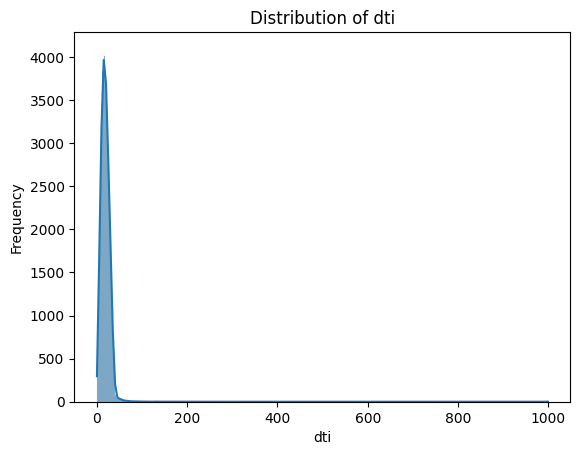

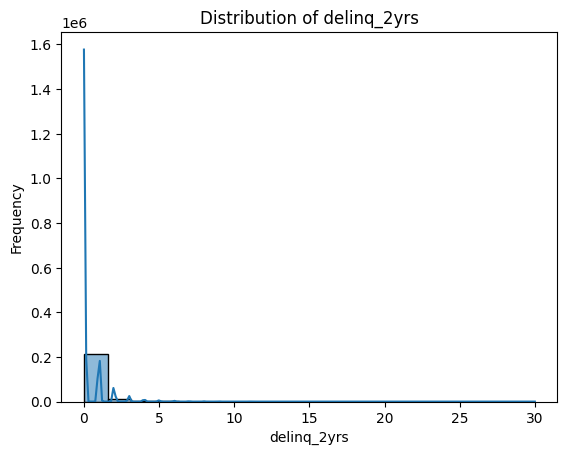

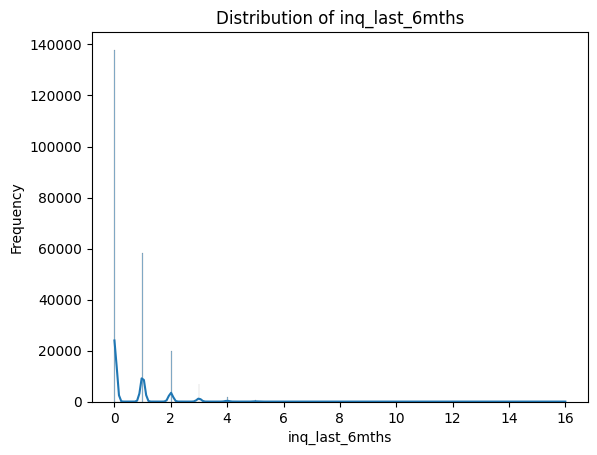

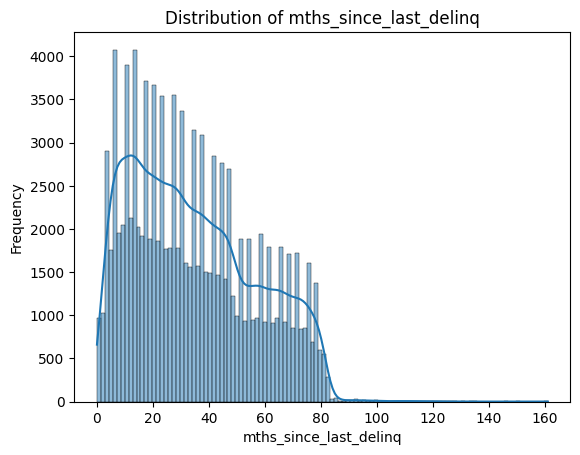

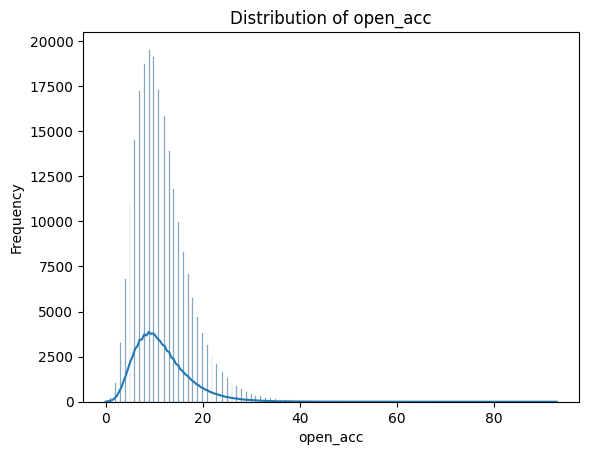

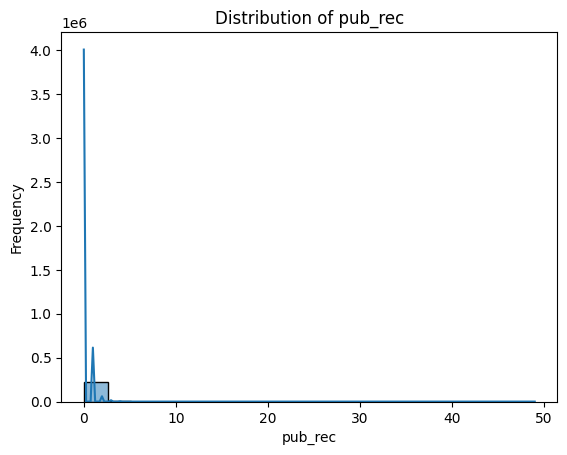

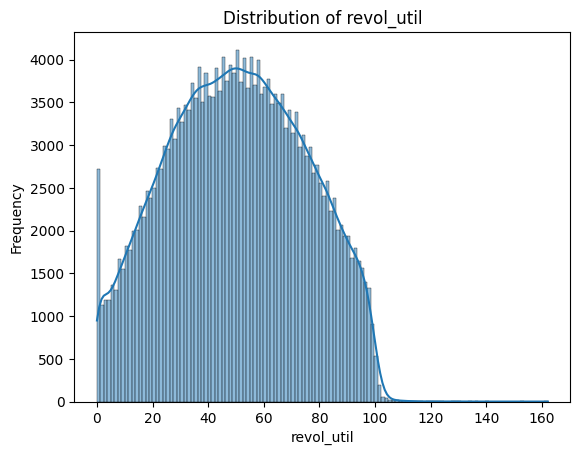

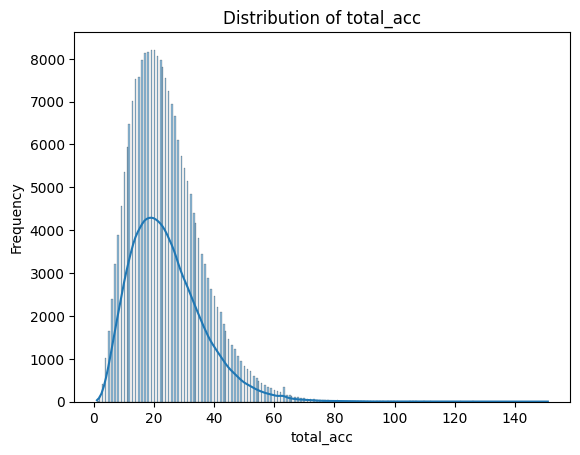

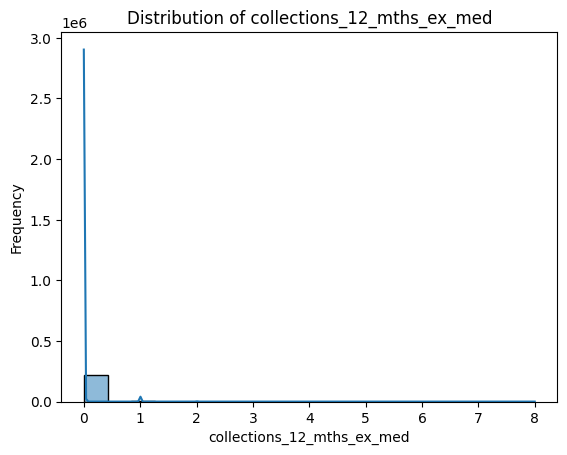

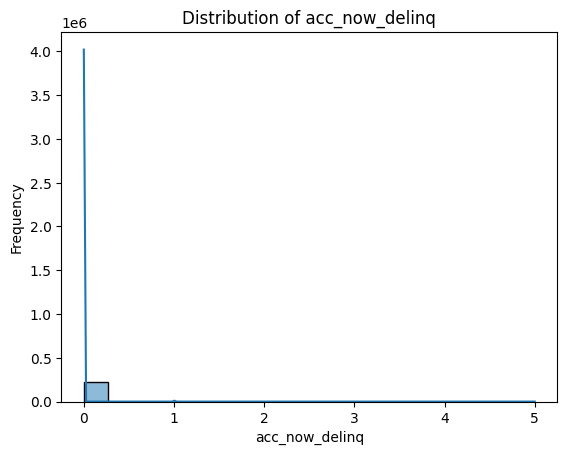

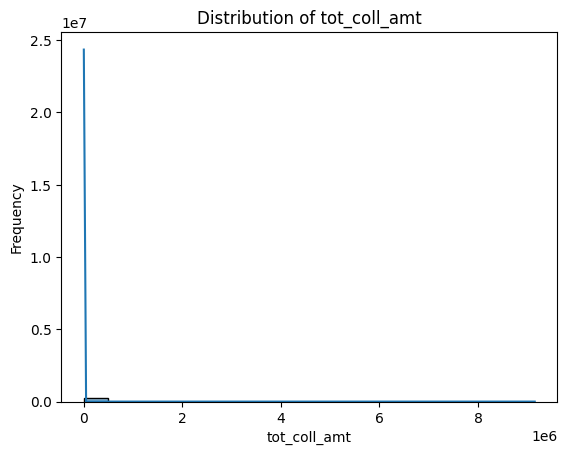

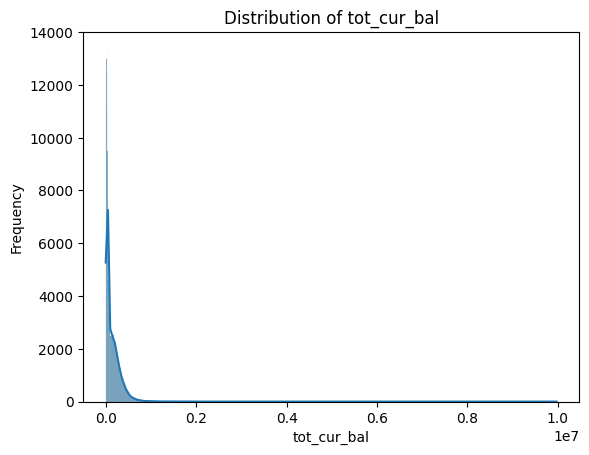

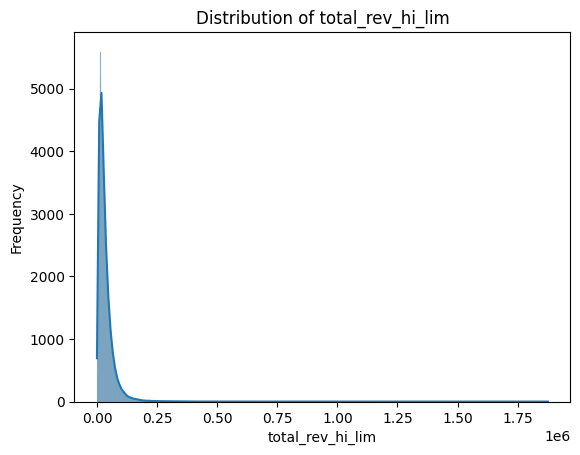

In [16]:
for column_name in columns_list:
    sns.histplot(train[column_name], kde=True)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name}')
    plt.show()

In [17]:
for column_name in columns_list:
    # Find the mode of the column
    mode_value = train[column_name].mode()[0] 

    # Fill missing values with the mode
    train[column_name] = train[column_name].fillna(mode_value)

In [18]:
train.isnull().sum()

loan_amnt                     0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
loan_status                   0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: i

In [19]:
object_columns = train.select_dtypes(include=['object'])

print("Columns with data type 'object':")
print(object_columns)

Columns with data type 'object':
       grade home_ownership loan_status application_type
0          B           RENT  Fully Paid       Individual
1          D       MORTGAGE     Current        Joint App
2          C            OWN  Fully Paid       Individual
3          D           RENT     Current       Individual
4          C       MORTGAGE  Fully Paid       Individual
...      ...            ...         ...              ...
226062     A           RENT     Current       Individual
226063     D       MORTGAGE     Current       Individual
226064     D           RENT  Fully Paid       Individual
226065     A            OWN  Fully Paid       Individual
226066     B           RENT  Fully Paid       Individual

[226067 rows x 4 columns]


In [20]:
#label encoder > ordinal relationship

train["grade"] = train["grade"].astype('category').cat.codes

train["grade"].unique()

array([1, 3, 2, 0, 5, 4, 6], dtype=int8)

In [21]:
train["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [22]:
train["application_type"].unique()

array(['Individual', 'Joint App'], dtype=object)

In [23]:
#one-hot encoder > Nominal variables
train = pd.get_dummies(train, columns=["home_ownership","application_type"])

In [24]:
train.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,18600,10.99,608.86,1,6.0,80000.0,Fully Paid,12.92,0.0,0.0,...,170238.0,20700.0,False,False,False,False,False,True,True,False
1,2000,17.97,72.28,3,4.0,55400.0,Current,10.62,1.0,2.0,...,351452.0,10800.0,False,True,False,False,False,False,False,True
2,12000,12.29,400.24,2,10.0,60000.0,Fully Paid,17.92,0.0,0.0,...,18207.0,20600.0,False,False,False,False,True,False,True,False
3,16000,19.42,589.90,3,7.0,64000.0,Current,3.90,1.0,0.0,...,12293.0,7800.0,False,False,False,False,False,True,True,False
4,22525,16.02,548.01,2,10.0,94080.0,Fully Paid,19.08,1.0,0.0,...,571244.0,53800.0,False,True,False,False,False,False,True,False


In [25]:
#change loan status to 0 and 1
train['loan_status'] = train['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [26]:
train['loan_status'].unique()

array([0, 1], dtype=int64)

Pre-processing Test data

Columns with null values:
id                            226067
member_id                     226067
emp_length                     14799
annual_inc                         1
dti                              174
delinq_2yrs                        5
inq_last_6mths                     6
mths_since_last_delinq        115999
open_acc                           5
pub_rec                            5
revol_util                       159
total_acc                          5
collections_12_mths_ex_med        22
acc_now_delinq                     5
tot_coll_amt                    7027
tot_cur_bal                     7027
total_rev_hi_lim                7027
dtype: int64
annual_inc : float64
dti : float64
delinq_2yrs : float64
inq_last_6mths : float64
mths_since_last_delinq : float64
open_acc : float64
pub_rec : float64
revol_util : float64
total_acc : float64
collections_12_mths_ex_med : float64
acc_now_delinq : float64
tot_coll_amt : float64
tot_cur_bal : float64
total_rev_hi_lim : float64


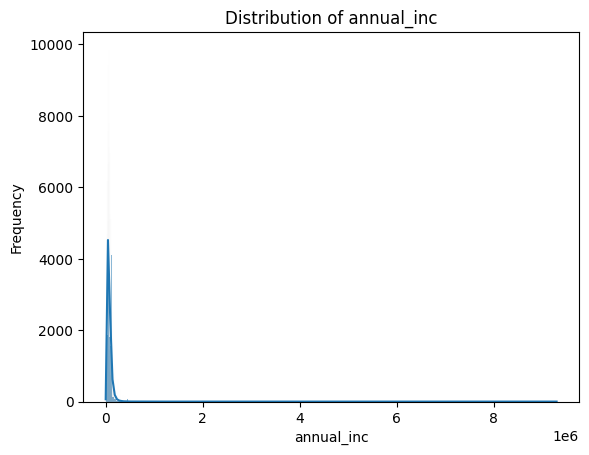

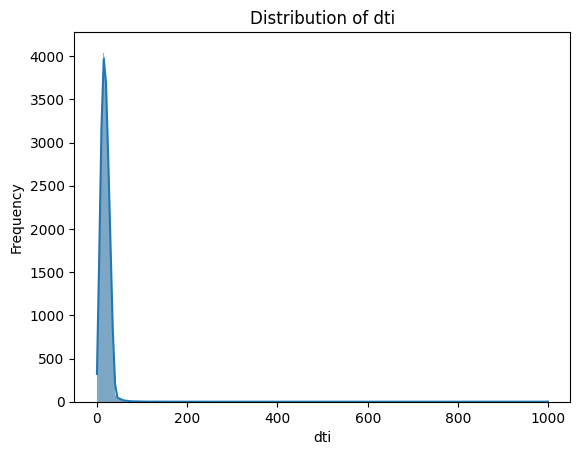

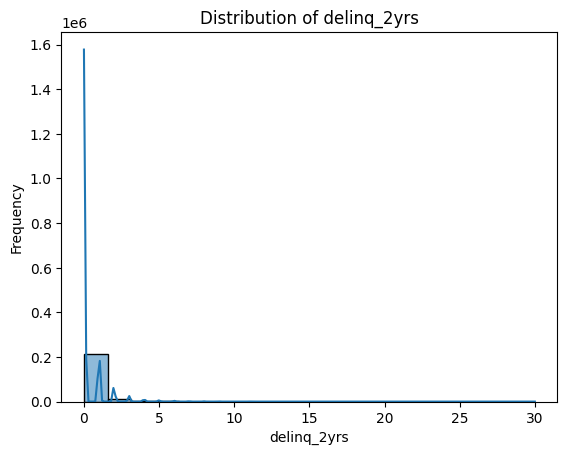

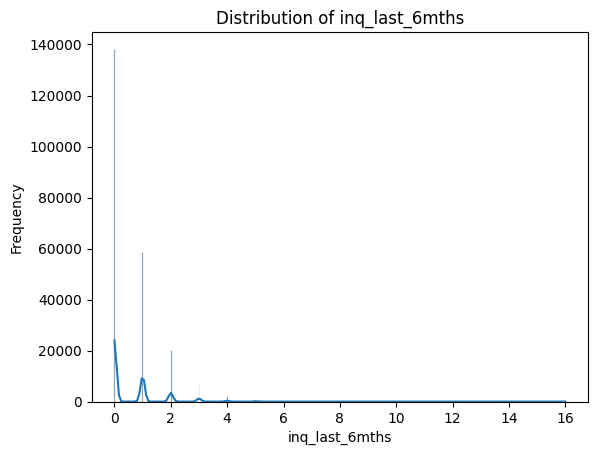

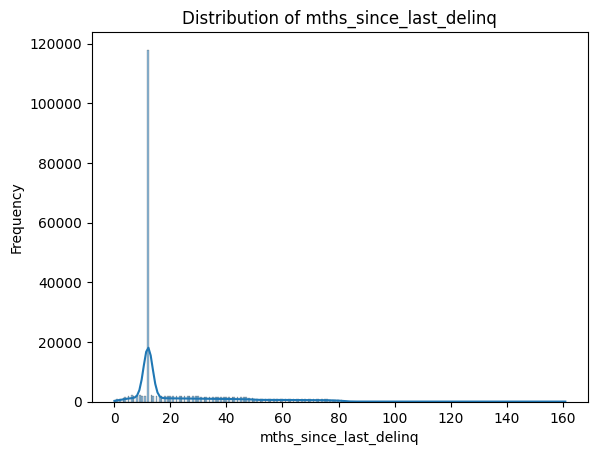

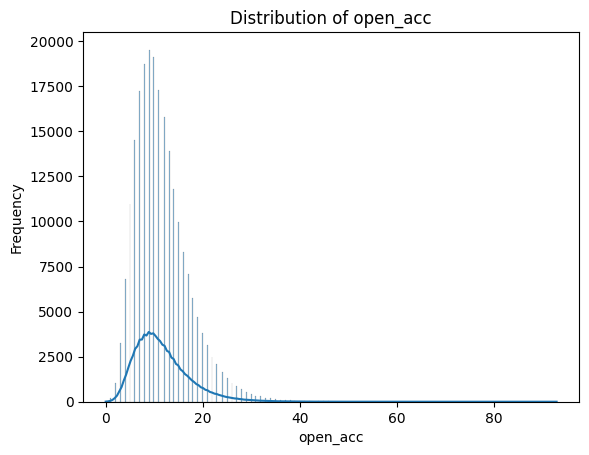

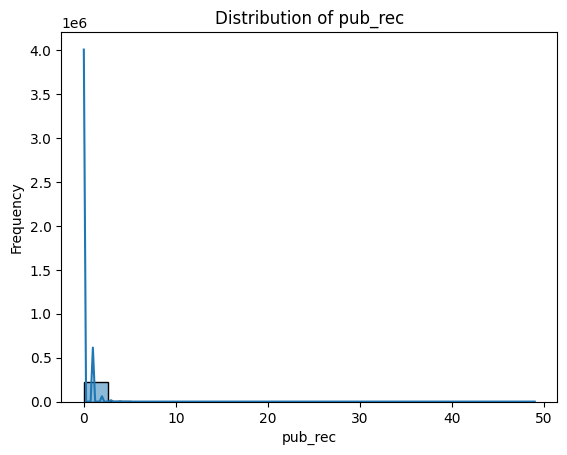

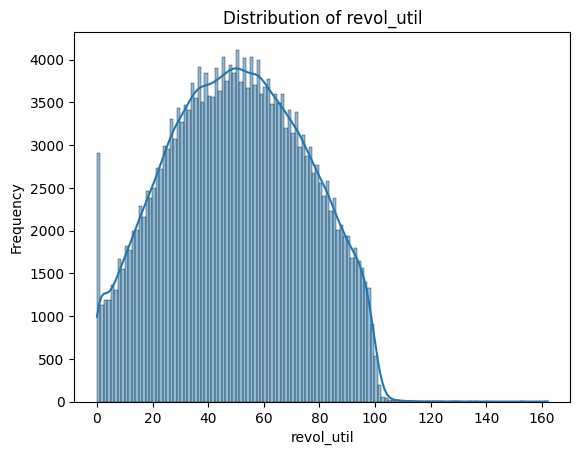

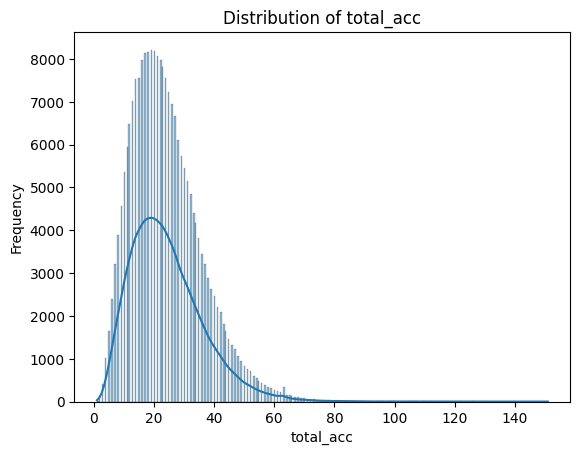

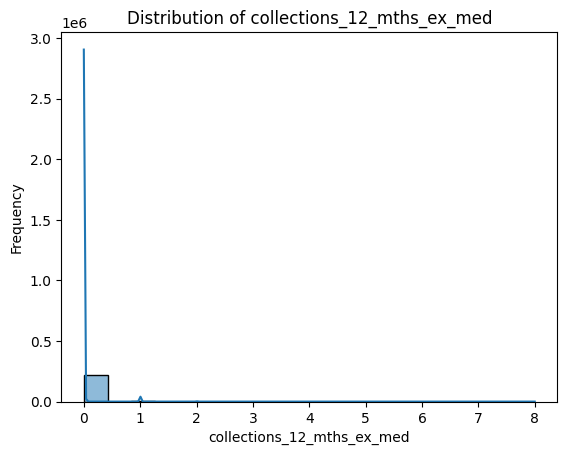

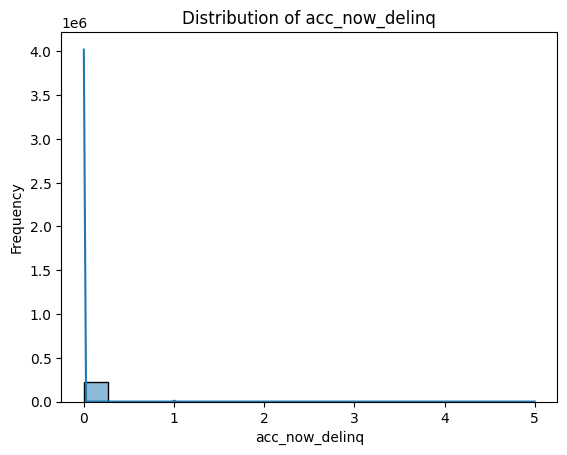

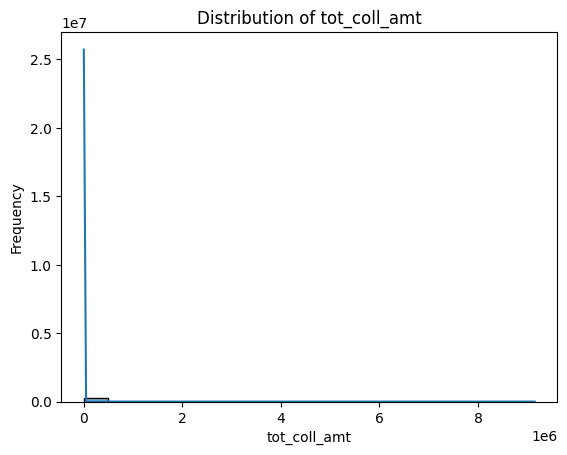

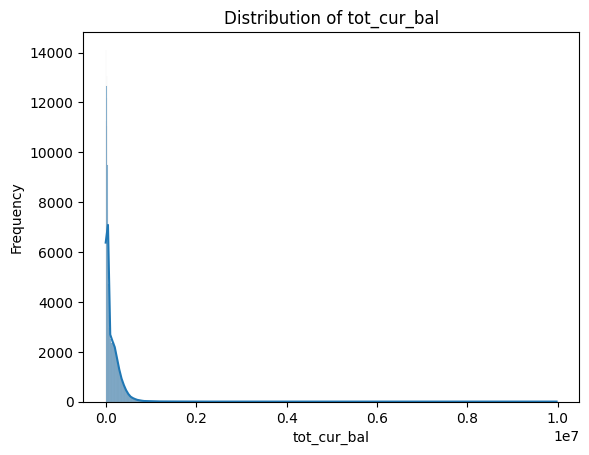

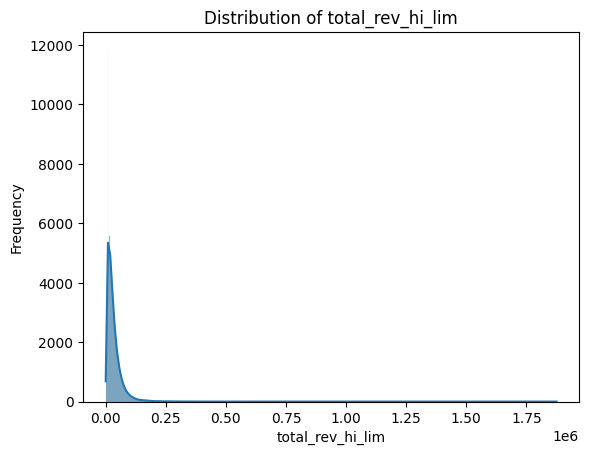

Columns with data type 'object':
       grade home_ownership loan_status application_type
0          A       MORTGAGE  Fully Paid       Individual
1          A           RENT     Current       Individual
2          C       MORTGAGE     Current       Individual
3          A       MORTGAGE  Fully Paid       Individual
4          C            OWN  Fully Paid       Individual
...      ...            ...         ...              ...
226062     C       MORTGAGE  Fully Paid       Individual
226063     B           RENT  Fully Paid       Individual
226064     B           RENT  Fully Paid       Individual
226065     A       MORTGAGE  Fully Paid       Individual
226066     E       MORTGAGE     Current       Individual

[226067 rows x 4 columns]


array([0, 1], dtype=int64)

In [27]:
# Check which columns have null values and how many null values each column has
null_counts = test.isnull().sum()

# Filter and display only the columns with null values
null_columns = null_counts[null_counts > 0]

print("Columns with null values:")
print(null_columns)

test = test.drop(['id','member_id'], axis=1)
test.head()

test['emp_length'].unique()

# Handle missing values
test['emp_length'] = test['emp_length'].fillna('< 1 year')

# Convert categorical values to numerical
test['emp_length'] = test['emp_length'].str.extract(r'(\d+)').astype(float)

test['emp_length'].unique()
test['emp_length'].isna().sum()

columns_list = ["annual_inc","dti","delinq_2yrs","inq_last_6mths","mths_since_last_delinq","open_acc","pub_rec","revol_util","total_acc","collections_12_mths_ex_med","acc_now_delinq","tot_coll_amt","tot_cur_bal","total_rev_hi_lim"]

for column_name in columns_list:
    print(f"{column_name} : {test[column_name].dtype}")

for column_name in columns_list:
    sns.histplot(train[column_name], kde=True)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name}')
    plt.show()

for column_name in columns_list:
    # Find the mode of the column
    mode_value = test[column_name].mode()[0] 

    # Fill missing values with the mode
    test[column_name] = test[column_name].fillna(mode_value)

test.isnull().sum()

object_columns = test.select_dtypes(include=['object'])

print("Columns with data type 'object':")
print(object_columns)

#label encoder > ordinal relationship
test["grade"] = test["grade"].astype('category').cat.codes

test["grade"].unique()
test["home_ownership"].unique()
test["application_type"].unique()

#one-hot encoder > Nominal variables
test = pd.get_dummies(test, columns=["home_ownership","application_type"])
test.head()

#change loan status to 0 and 1
test['loan_status'] = test['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
test['loan_status'].unique()

In [28]:
test.isna().sum()

loan_amnt                      0
int_rate                       0
installment                    0
grade                          0
emp_length                     0
annual_inc                     0
loan_status                    0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
collections_12_mths_ex_med     0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
total_rev_hi_lim               0
home_ownership_ANY             0
home_owner

split train and validation

In [29]:
X = train.drop('loan_status', axis=1) #features
y = train['loan_status'] #labels

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape

(180853, 36)

In [32]:
X_val.shape

(45214, 36)

Model Training

In [33]:
n_folds = 5

def mse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    mse= -cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf)
    return mse

In [34]:
scaler = StandardScaler()

In [35]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [36]:
def train_and_evaluate(model):

  scaler_x = scaler.fit(X_train)

  X_train_scaled = scaler_x.transform(X_train)

  # Fit the model to the scaled training data
  model.fit(X_train_scaled,y_train)

  X_val_scaled = scaler_x.transform(X_val)

  # Predict the target variable for the scaled validation set
  y_pred = model.predict(X_val_scaled)

  # Evaluate the model
  train_loss = mean_squared_error(y_val,y_pred)

  print("Mean Squared Error of validation set: {:.3f}\n".format(train_loss))

Linear Regression Model

In [37]:
# Instantiate the linear regression model
model = LinearRegression()

train_and_evaluate(model)

Mean Squared Error of validation set: 0.068



Ridge Regression Model

In [38]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', scaler),  # Scale the features
    ('ridge', Ridge())        # model
])

# Define the range of values for the hyperparameter lambda
lambda_values = np.arange(0.01, 100.01, 0.01)

# Define the hyperparameter grid
param_grid = {'ridge__alpha': lambda_values}

# Perform grid search cross-validation to find the best value of lambda
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_jobs=-1, cv=4, random_state=42, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)


# Get the best value of lambda and the corresponding mean squared error
best_param = grid_search.best_params_['ridge__alpha']

best_mse = -grid_search.best_score_

print("Best lambda: {:.3f}".format(best_param))
print("Best Mean Squared Error: {:.3f}".format(best_mse))

# Fit the best model using the best hyperparameters
best_model = grid_search.best_estimator_

train_and_evaluate(best_model)

Best lambda: 83.230
Best Mean Squared Error: 0.068
Mean Squared Error of validation set: 0.068



Lasso Regresion Model

In [39]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', scaler),  # Scale the features
    ('lasso', Lasso())        # model
])

# Define the range of values for the hyperparameter lambda
lambda_values = np.arange(0.01, 100.01, 0.01)

# Define the hyperparameter grid
param_grid = {'lasso__alpha': lambda_values}

# Perform grid search cross-validation to find the best value of lambda
grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_jobs=-1, cv=4, random_state=42, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best value of lambda and the corresponding mean squared error
best_lambda = grid_search.best_params_['lasso__alpha']
best_mse = -grid_search.best_score_

print("Best lambda:", best_lambda)
print("Best Mean Squared Error:", best_mse)

# Fit the best model using the best hyperparameters
best_model = grid_search.best_estimator_

train_and_evaluate(best_model)

Best lambda: 72.71000000000001
Best Mean Squared Error: 0.10223191627116368
Mean Squared Error of validation set: 0.102



 Random Forest

In [40]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('ramdomforest', RandomForestRegressor())        # model
])

# Define the hyperparameter grid
param_grid = {
    'ramdomforest__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'ramdomforest__max_depth': [None, 10, 20],       # Maximum depth of the trees
    'ramdomforest__min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'ramdomforest__min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_jobs=-1, cv=4, random_state=42, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding mean squared error
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best Mean Squared Error:", best_mse)

# Fit the best model using the best hyperparameters
best_model = grid_search.best_estimator_

train_and_evaluate(best_model)

KeyboardInterrupt: 

Neural Network

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('mlp', MLPRegressor())        # model
])

# Define the hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'mlp__activation': ['relu', 'tanh', 'logistic'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_jobs=-1, cv=4, random_state=42, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding mean squared error
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best Mean Squared Error:", best_mse)

# Fit the best model using the best hyperparameters
best_model = grid_search.best_estimator_

train_and_evaluate(best_model)

Best hyperparameters: {'mlp__hidden_layer_sizes': (100, 50), 'mlp__alpha': 0.0001, 'mlp__activation': 'tanh'}
Best Mean Squared Error: 0.03133939633077677
Mean Squared Error of validation set: 0.033



Evaluation

In [ ]:
test.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,8000,7.07,247.28,0,10.0,78000.0,0,19.25,0.0,0.0,...,200412.0,16800.0,False,True,False,False,False,False,True,False
1,20000,7.21,619.47,0,3.0,78000.0,0,23.06,0.0,0.0,...,39187.0,42100.0,False,False,False,False,False,True,True,False
2,20000,12.74,452.41,2,5.0,97000.0,0,5.52,1.0,0.0,...,279688.0,6500.0,False,True,False,False,False,False,True,False
3,20000,8.81,634.23,0,10.0,115000.0,0,16.84,0.0,2.0,...,172493.0,40200.0,False,True,False,False,False,False,True,False
4,20000,15.31,479.06,2,10.0,75000.0,0,7.95,0.0,3.0,...,0.0,13000.0,False,False,False,False,True,False,True,False


In [ ]:
X_test = test.drop('loan_status', axis=1) #features
y_test = test['loan_status'] #labels

In [ ]:
scaler_x = scaler.fit(X_train)

In [ ]:
X_test_scaled = scaler_x.transform(X_test)

In [ ]:
y_pred = best_model.predict(X_test_scaled)

In [ ]:
mean_squared_error(y_test,y_pred)

0.03327714822889454